In [165]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [166]:
df = pd.read_csv('IRIS_Dataset.csv')
df.shape

(150, 5)

In [167]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [168]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [169]:
#df.hist(column='sepallength', bins=50)
#df.hist(column='sepalwidth', bins=50)
#df.hist(column='petallength', bins=50)
#df.hist(column='petalwidth', bins=50)

In [170]:
df.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [171]:
X = df[['sepallength', 'sepalwidth','petallength', 'petalwidth']] .values  #.astype(float)
y = df['class'].values
print (X[0:5])
y

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [172]:
from sklearn import preprocessing
classs=preprocessing.LabelEncoder()
classs.fit(['Iris-setosa','Iris-versicolor','Iris-virginica'])
y=classs.transform(y)
df['class']=y
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [173]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.9 ,  1.03, -1.34, -1.31],
       [-1.14, -0.12, -1.34, -1.31],
       [-1.39,  0.34, -1.4 , -1.31],
       [-1.51,  0.11, -1.28, -1.31],
       [-1.02,  1.26, -1.34, -1.31]])

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


In [175]:
from sklearn.neighbors import KNeighborsClassifier


In [176]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [177]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 1, 2, 2, 1])

In [178]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9666666666666667
Test set Accuracy:  0.9333333333333333


In [179]:
# write your code here

k=6
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh
y_hat=neigh.predict(X_test)

y_hat[0:5]

from sklearn import metrics
print("The accuracy of Train test",metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("The accuracy of test data is:",metrics.accuracy_score(y_test, yhat))

The accuracy of Train test 0.975
The accuracy of test data is: 0.9333333333333333


In [180]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
print(std_acc)



[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [181]:
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
# std_acc

array([0.93, 0.93, 0.97, 0.93, 0.97, 0.93, 0.93, 0.93, 0.93])

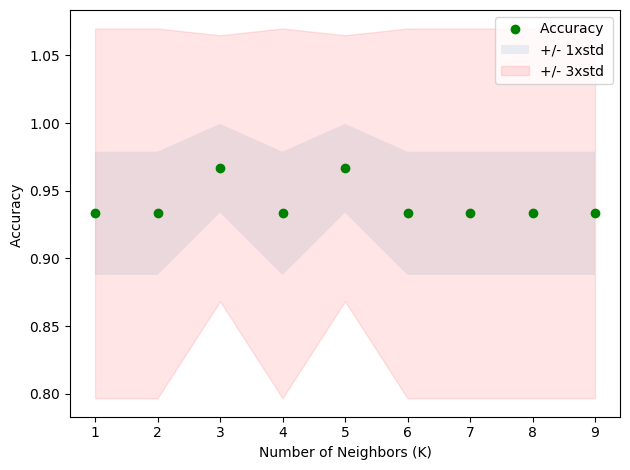

In [182]:
plt.plot(range(1,Ks),mean_acc,'go')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="red")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [183]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9666666666666667 with k= 3


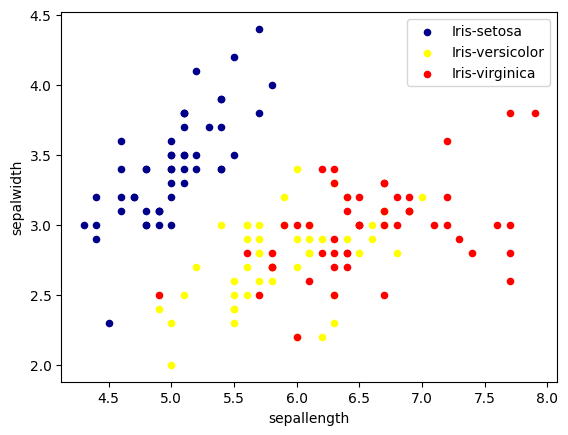

In [184]:
ax = df[df['class'] == 0][0:50].plot(kind='scatter', x='sepallength', y='sepalwidth', color='DarkBlue', label='Iris-setosa');
df[df['class'] == 1][0:50].plot(kind='scatter', x='sepallength', y='sepalwidth', color='Yellow', label='Iris-versicolor', ax=ax);
df[df['class'] == 2][0:50].plot(kind='scatter', x='sepallength', y='sepalwidth', color='red', label='Iris-virginica', ax=ax);
plt.show()

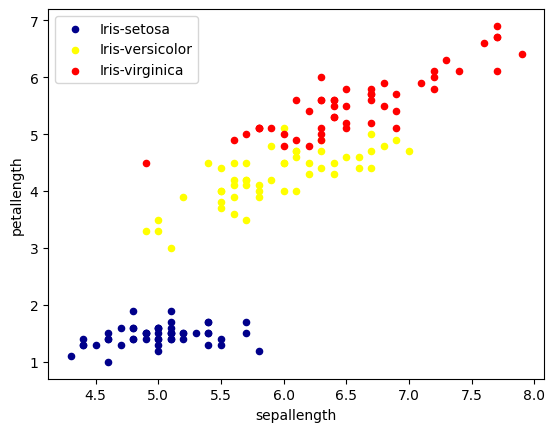

In [185]:
ax = df[df['class'] == 0][0:50].plot(kind='scatter', x='sepallength', y='petallength', color='DarkBlue', label='Iris-setosa');
df[df['class'] == 1][0:50].plot(kind='scatter', x='sepallength', y='petallength', color='Yellow', label='Iris-versicolor', ax=ax);
df[df['class'] == 2][0:50].plot(kind='scatter', x='sepallength', y='petallength', color='red', label='Iris-virginica', ax=ax);
plt.show()

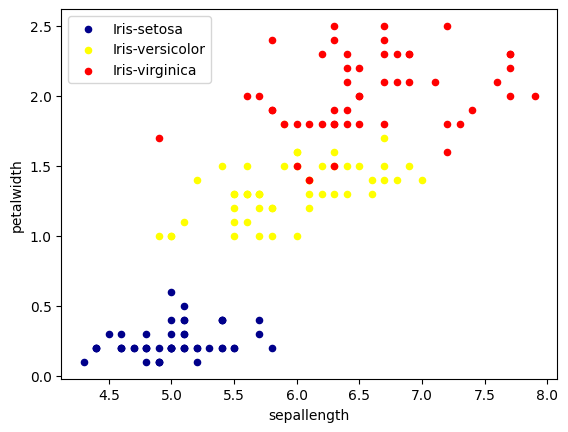

In [186]:
ax = df[df['class'] == 0][0:50].plot(kind='scatter', x='sepallength', y='petalwidth', color='DarkBlue', label='Iris-setosa');
df[df['class'] == 1][0:50].plot(kind='scatter', x='sepallength', y='petalwidth', color='Yellow', label='Iris-versicolor', ax=ax);
df[df['class'] == 2][0:50].plot(kind='scatter', x='sepallength', y='petalwidth', color='red', label='Iris-virginica', ax=ax);
plt.show()

In [187]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [188]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 1, 2, 2, 1])

In [189]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [190]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion matrix, without normalization
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]


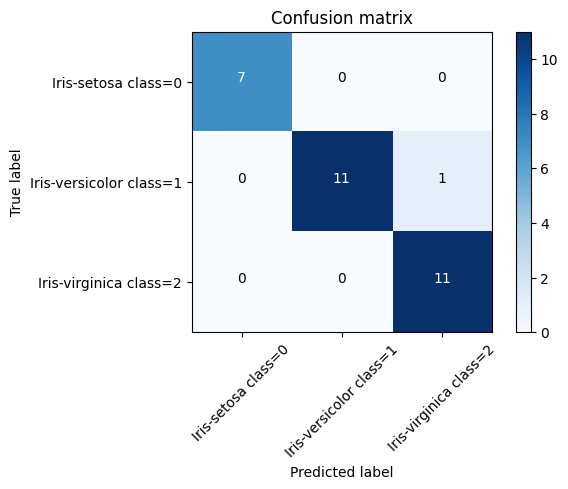

In [191]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Iris-setosa class=0','Iris-versicolor class=1','Iris-virginica class=2'],normalize= False,  title='Confusion matrix')

In [196]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9666666666666667

In [195]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=2,average='weighted')

C:\Users\Sajjad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.9361111111111111